In [2]:
import csv

# Open the input dataset file
with open('bank-full.csv', 'r') as input_file:
    reader = csv.reader(input_file, delimiter=';')

    # Create a new output file to store the formatted data
    with open('formatted_dataset.csv', 'w', newline='') as output_file:
        writer = csv.writer(output_file)

        # Read the first row and remove the double quotes
        header = next(reader)
        header = [col.strip('"') for col in header]

        # Write the header row to the output file
        writer.writerow(header)

        # Process each row in the input file
        for row in reader:
            # Remove the double quotes and split the row by semicolon (;)
            row = [col.strip('"') for col in row]
            row = [col.split(';')[0] for col in row]

            # Write the processed row to the output file
            writer.writerow(row)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('formatted_dataset.csv')

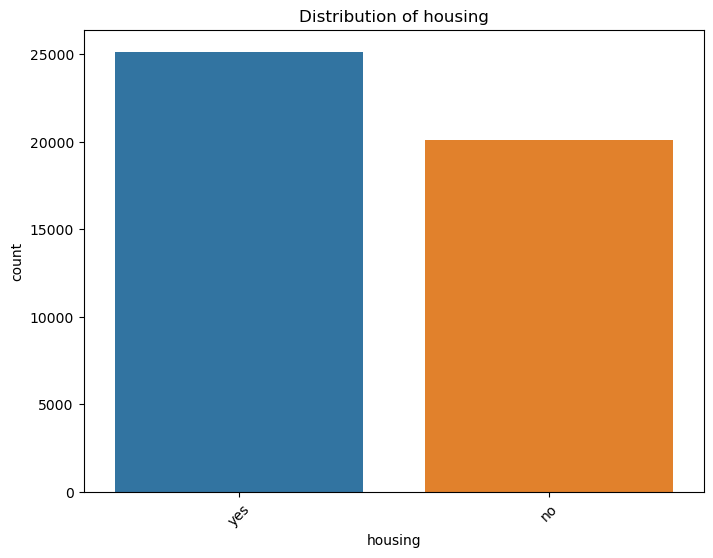

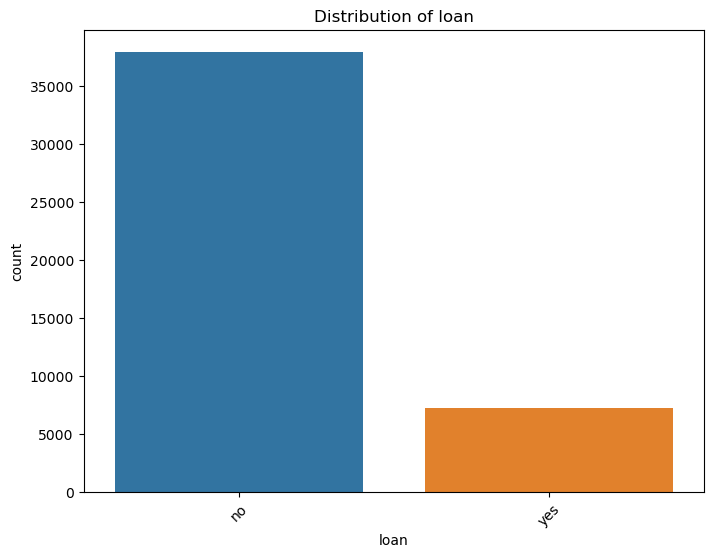

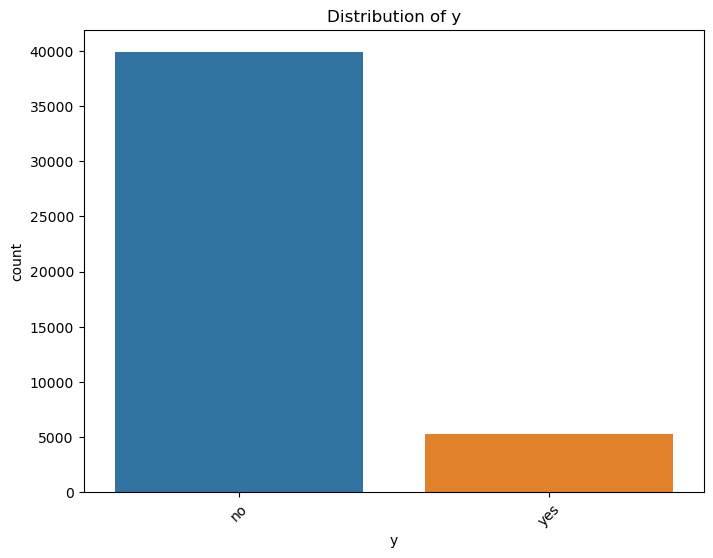

In [6]:
categorical_vars = ['housing', 'loan', 'y']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

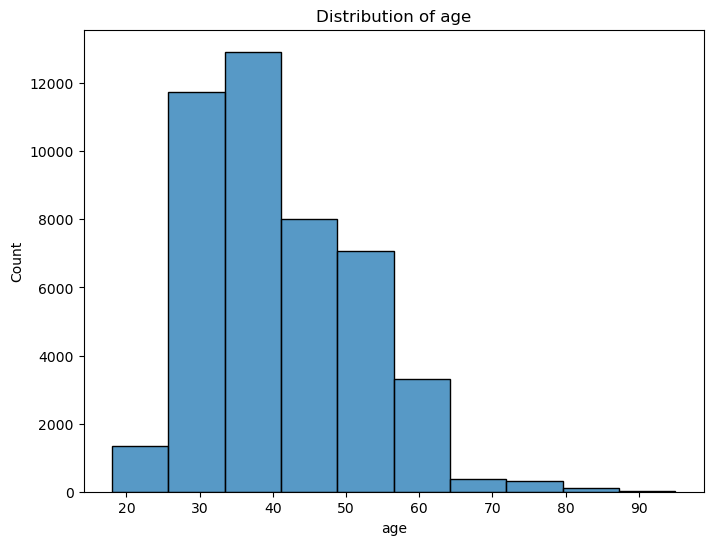

In [7]:
numerical_vars = ['age']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, bins=10)
    plt.title(f'Distribution of {var}')
    plt.show()


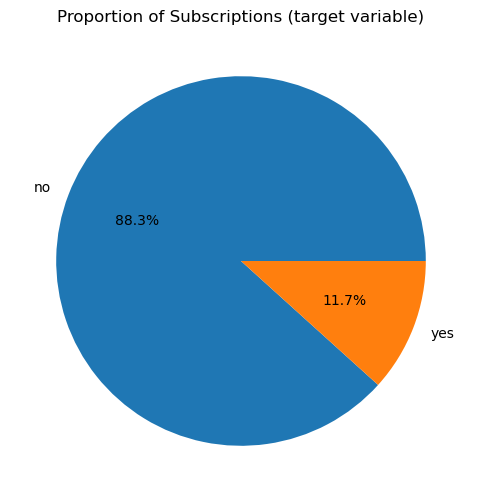

In [9]:
plt.figure(figsize=(6, 6))
df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Subscriptions (target variable)')
plt.ylabel('')
plt.show()

/var/folders/w6/zqldyw_93rx8rzq8p4r2l5nm0000gn/T/ipykernel_69715/3030710523.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


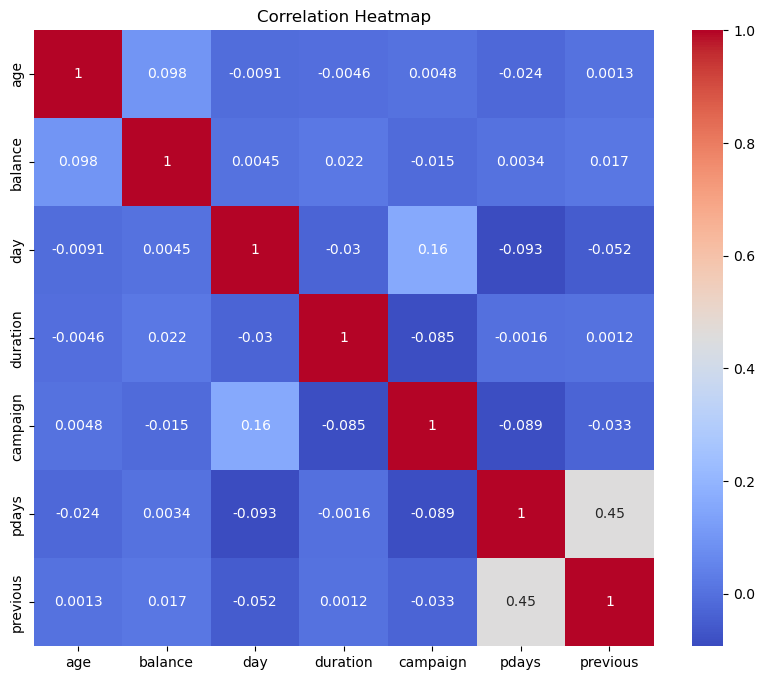

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Figure size 800x600 with 0 Axes>

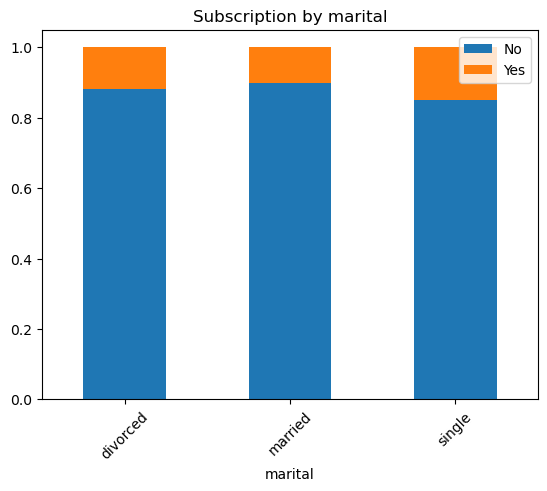

In [13]:
# Stacked bar plots
stacked_vars = [ 'marital']
for var in stacked_vars:
    plt.figure(figsize=(8, 6))
    cross_tab = pd.crosstab(df[var], df['y'])
    cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title(f'Subscription by {var}')
    plt.xticks(rotation=45)
    plt.legend(['No', 'Yes'])
    plt.show()

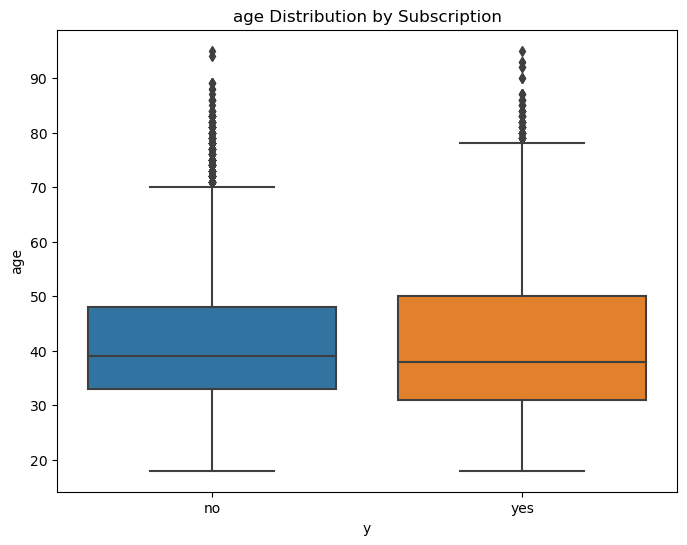

In [15]:
# Box plots
numerical_vars = ['age']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='y', y=var)
    plt.title(f'{var} Distribution by Subscription')
    plt.show()

<Figure size 800x600 with 0 Axes>

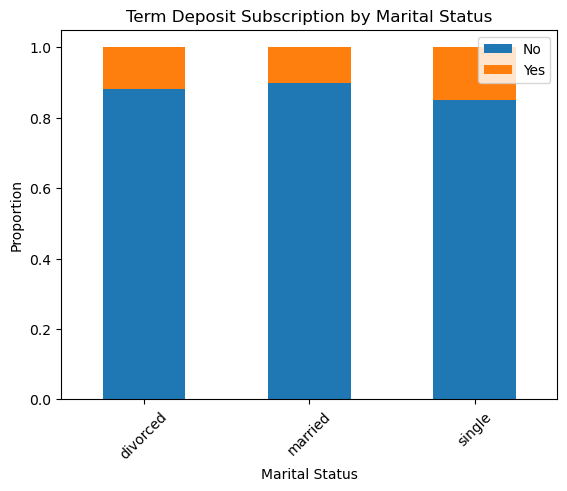

In [16]:
import matplotlib.pyplot as plt

# Create a cross-tabulation between 'marital' and 'y'
cross_tab = pd.crosstab(df['marital'], df['y'])

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
cross_tab.div(cross_tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Term Deposit Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(['No', 'Yes'])
plt.show()

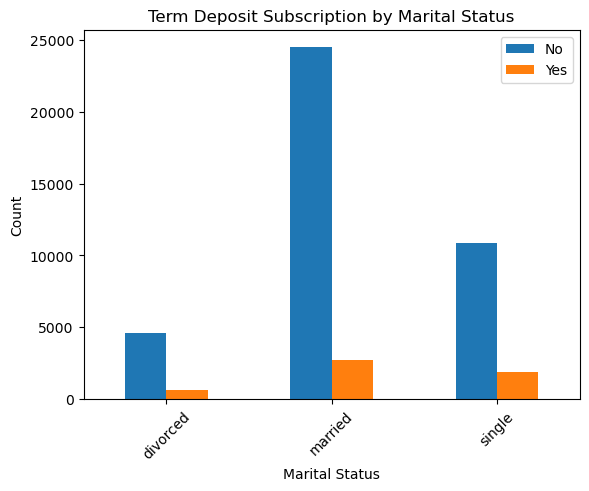

In [17]:
# Group the data by 'marital' and 'y', and calculate the count
grouped_data = df.groupby(['marital', 'y']).size().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', stacked=False)
plt.title('Term Deposit Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No', 'Yes'])
plt.show()

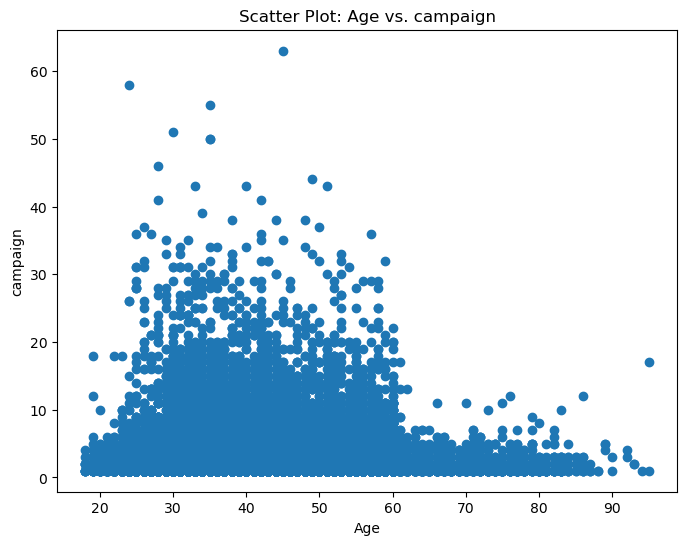

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['campaign'])
plt.title('Scatter Plot: Age vs. campaign')
plt.xlabel('Age')
plt.ylabel('campaign')
plt.show()

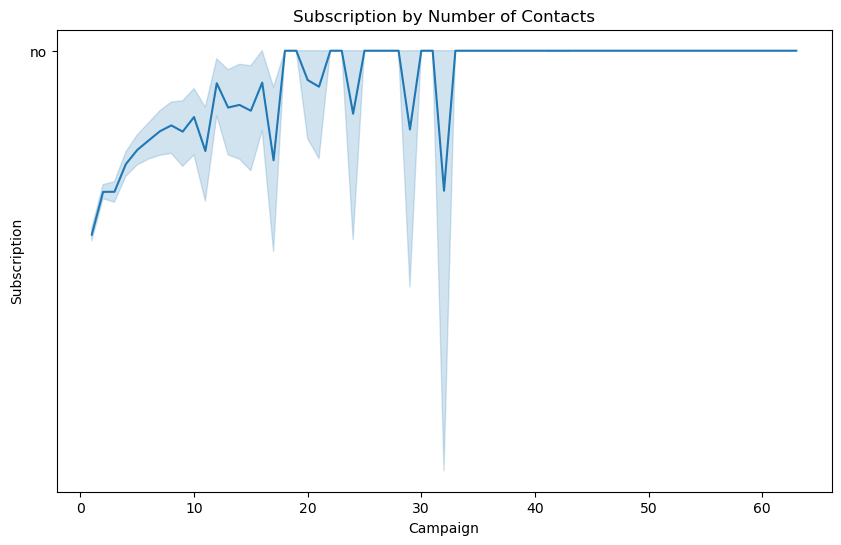

In [21]:
# Line plot for campaign and emp.var.rate
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='campaign', y='y')
plt.title('Subscription by Number of Contacts')
plt.xlabel('Campaign')
plt.ylabel('Subscription')
plt.show()

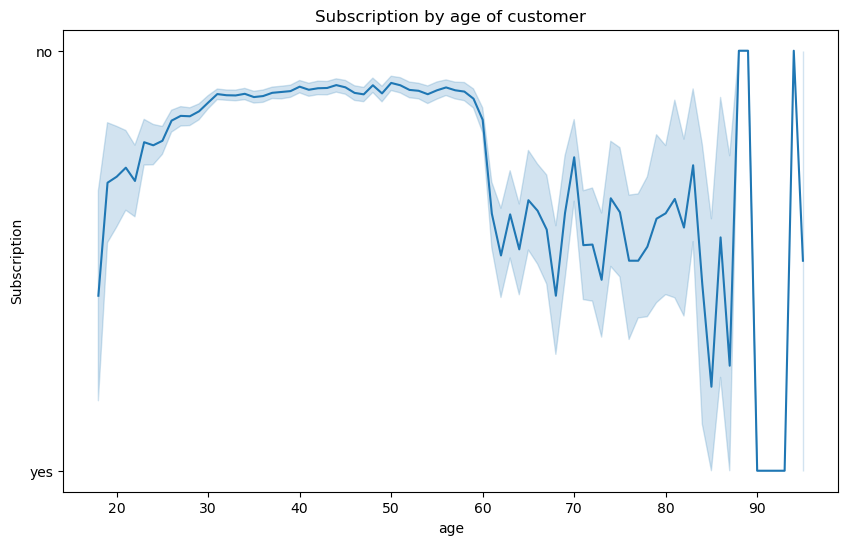

In [23]:
# Line plot for campaign and emp.var.rate
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='y')
plt.title('Subscription by age of customer')
plt.xlabel('age')
plt.ylabel('Subscription')
plt.show()